In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
# make the data more readable and index the col 0
data = pd.read_csv(r'D:\spring 25\appiled stat\anika Sprint 1\data\Consumer_Airfare_Report__Table_3_-_City-Pair_Markets_With_A_Substantial_Increase_In_Average_Fare_20250421.csv',index_col = 0)
data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,Geocoded_City1,Geocoded_City2
tbl,,,,,,,,,,,,,,,,
Table 3,2024,4,30189,30466,"Colorado Springs, CO","Phoenix, AZ",34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,NaN,NaN
Table 3,2024,4,30189,32211,"Colorado Springs, CO","Las Vegas, NV",29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,NaN,NaN
Table 3,2024,4,30189,32575,"Colorado Springs, CO","Los Angeles, CA (Metropolitan Area)",24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,NaN,NaN
Table 3,2024,4,30325,31136,"Denver, CO","Jacksonville, FL",40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,NaN,NaN
Table 3,2024,4,30397,30647,"Atlanta, GA (Metropolitan Area)","Cleveland, OH (Metropolitan Area)",82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,NaN,NaN


In [6]:
data.shape

(3218, 16)

In [7]:
data.info()
#numerican columns, Year, cur_passengers, ly_passengers

<class 'pandas.core.frame.DataFrame'>
Index: 3218 entries, Table 3 to Table 3
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3218 non-null   int64  
 1   quarter             3218 non-null   int64  
 2   citymarketid_1      3218 non-null   int64  
 3   citymarketid_2      3218 non-null   int64  
 4   city1               3218 non-null   object 
 5   city2               3218 non-null   object 
 6   cur_passengers      3218 non-null   int64  
 7   cur_fare            3218 non-null   float64
 8   ly_fare             3218 non-null   float64
 9   ly_passengers       3218 non-null   int64  
 10  amount_change       3218 non-null   float64
 11  percent_change      3218 non-null   float64
 12  amount_change_pax   3218 non-null   int64  
 13  percent_change_pax  3218 non-null   float64
 14  Geocoded_City1      1860 non-null   object 
 15  Geocoded_City2      1860 non-null   object 
dtypes:

In [8]:
#delete the colunms, quarter, citymarketid_1, citymarketid_2, Geocoded_City1, Geocoded_City2 (they are all lowercase)
data_clean = data.drop([ 'citymarketid_1', 'citymarketid_2', 'Geocoded_City1', 'Geocoded_City2'], axis=1, inplace=False)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3218 entries, Table 3 to Table 3
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3218 non-null   int64  
 1   quarter             3218 non-null   int64  
 2   city1               3218 non-null   object 
 3   city2               3218 non-null   object 
 4   cur_passengers      3218 non-null   int64  
 5   cur_fare            3218 non-null   float64
 6   ly_fare             3218 non-null   float64
 7   ly_passengers       3218 non-null   int64  
 8   amount_change       3218 non-null   float64
 9   percent_change      3218 non-null   float64
 10  amount_change_pax   3218 non-null   int64  
 11  percent_change_pax  3218 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 326.8+ KB


In [9]:
#join 'city1' and 'city2' columns into a new column 'city_pair'
data_clean['city_pair'] = data_clean['city1'].astype(str) + '-' + data_clean['city2'].astype(str)

# Reorder the columns
cols = list(data_clean.columns)
cols.insert(1, cols.pop(cols.index('city_pair')))  # Move 'city_pair' to the second position
data_clean = data_clean[cols]

# Delete the 'city1' and 'city2' columns
data_clean = data_clean.drop(['city1', 'city2'], axis=1)


# Display the updated DataFrame
data_clean.head()


,Year,city_pair,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax
tbl,,,,,,,,,,,
Table 3,2024,"Colorado Springs, CO-Phoenix, AZ",4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233
Table 3,2024,"Colorado Springs, CO-Las Vegas, NV",4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417
Table 3,2024,"Colorado Springs, CO-Los Angeles, CA (Metropol...",4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209
Table 3,2024,"Denver, CO-Jacksonville, FL",4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705
Table 3,2024,"Atlanta, GA (Metropolitan Area)-Cleveland, OH ...",4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402


In [10]:
# Convert integer columns to float, except 'Year' and 'city_pair'
for col in data_clean.columns:
    if col not in ['Year', 'city_pair']:
        if data_clean[col].dtype == 'int64':  # Check if column is of integer type
            data_clean[col] = data_clean[col].astype(float)

# Display the updated DataFrame
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3218 entries, Table 3 to Table 3
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                3218 non-null   int64  
 1   city_pair           3218 non-null   object 
 2   quarter             3218 non-null   float64
 3   cur_passengers      3218 non-null   float64
 4   cur_fare            3218 non-null   float64
 5   ly_fare             3218 non-null   float64
 6   ly_passengers       3218 non-null   float64
 7   amount_change       3218 non-null   float64
 8   percent_change      3218 non-null   float64
 9   amount_change_pax   3218 non-null   float64
 10  percent_change_pax  3218 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 301.7+ KB


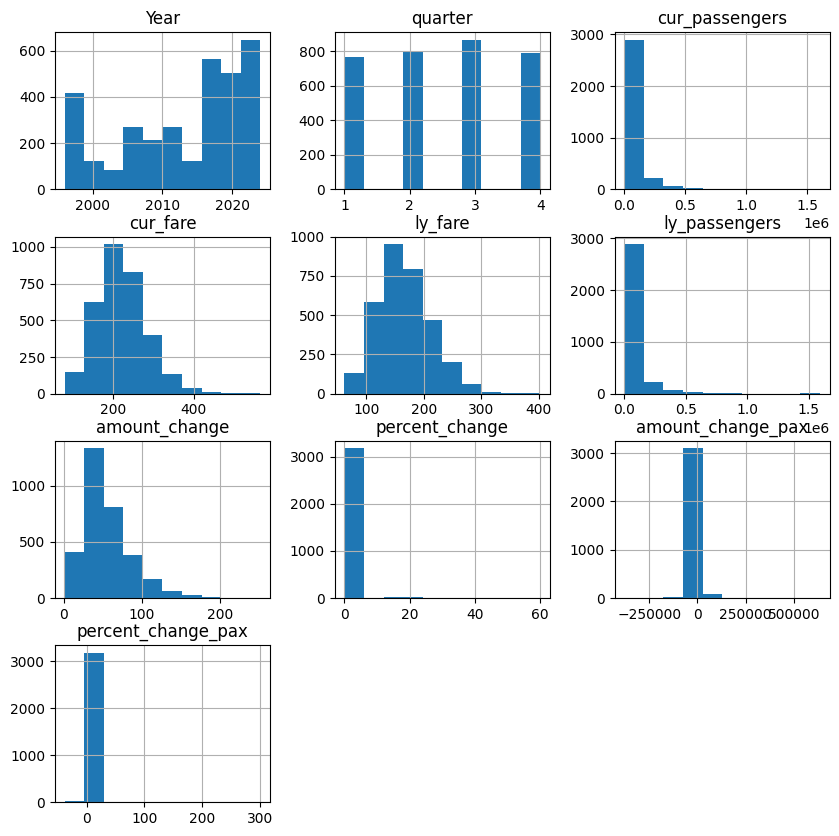

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax
count,3218.000000,3218.000000,3.218000e+03,3218.000000,3218.000000,3.218000e+03,3218.000000,3218.000000,3218.000000,3218.000000
mean,2012.974518,2.519888,7.288621e+04,221.457654,166.220926,7.843235e+04,55.236722,0.650568,-5546.140460,-0.027320
std,8.906517,1.102351,1.086884e+05,62.266076,45.562036,1.091020e+05,31.628042,2.943303,30197.713887,5.649830
min,1996.000000,1.000000,2.530000e+03,79.010000,61.980000,6.000000e+01,1.240000,0.010500,-378700.000000,-37.748300
25%,2006.000000,2.000000,2.198500e+04,178.125000,133.360000,2.660000e+04,33.870000,0.190725,-11870.000000,-0.218675
50%,2016.000000,3.000000,3.709500e+04,216.015000,161.900000,4.434500e+04,48.500000,0.320850,-5240.000000,-0.107450
75%,2021.000000,3.000000,7.701000e+04,258.947500,195.325000,8.412750e+04,70.620000,0.449000,-790.000000,-0.018200
max,2024.000000,4.000000,1.604490e+06,565.680000,402.300000,1.592880e+06,251.130000,60.008600,635880.000000,299.833300


In [11]:
# histograms in matplotlib
data_clean.hist(figsize=(10, 10))
plt.show()
data_clean.describe()

In [12]:
#look at the nuerical colunms
#select the numerical colunm
numer = data_clean.select_dtypes(include=['float64', 'int64'])
numer

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax
tbl,,,,,,,,,,
Table 3,2024,4.0,34490.0,205.96,169.88,39340.0,36.08,0.2124,-4850.0,-0.1233
Table 3,2024,4.0,29550.0,197.70,156.70,34430.0,41.00,0.2617,-4880.0,-0.1417
Table 3,2024,4.0,24910.0,256.22,192.41,36680.0,63.81,0.3316,-11770.0,-0.3209
Table 3,2024,4.0,40090.0,315.81,257.61,43130.0,58.19,0.2259,-3040.0,-0.0705
Table 3,2024,4.0,82790.0,211.52,164.20,79590.0,47.32,0.2882,3200.0,0.0402
...,...,...,...,...,...,...,...,...,...,...
Table 3,1996,1.0,12410.0,241.87,185.65,16020.0,56.23,0.3029,-3610.0,-0.2253
Table 3,1996,1.0,19930.0,94.37,67.68,64840.0,26.69,0.3944,-44910.0,-0.6926
Table 3,1996,1.0,13730.0,227.64,170.86,24760.0,56.78,0.3323,-11030.0,-0.4455


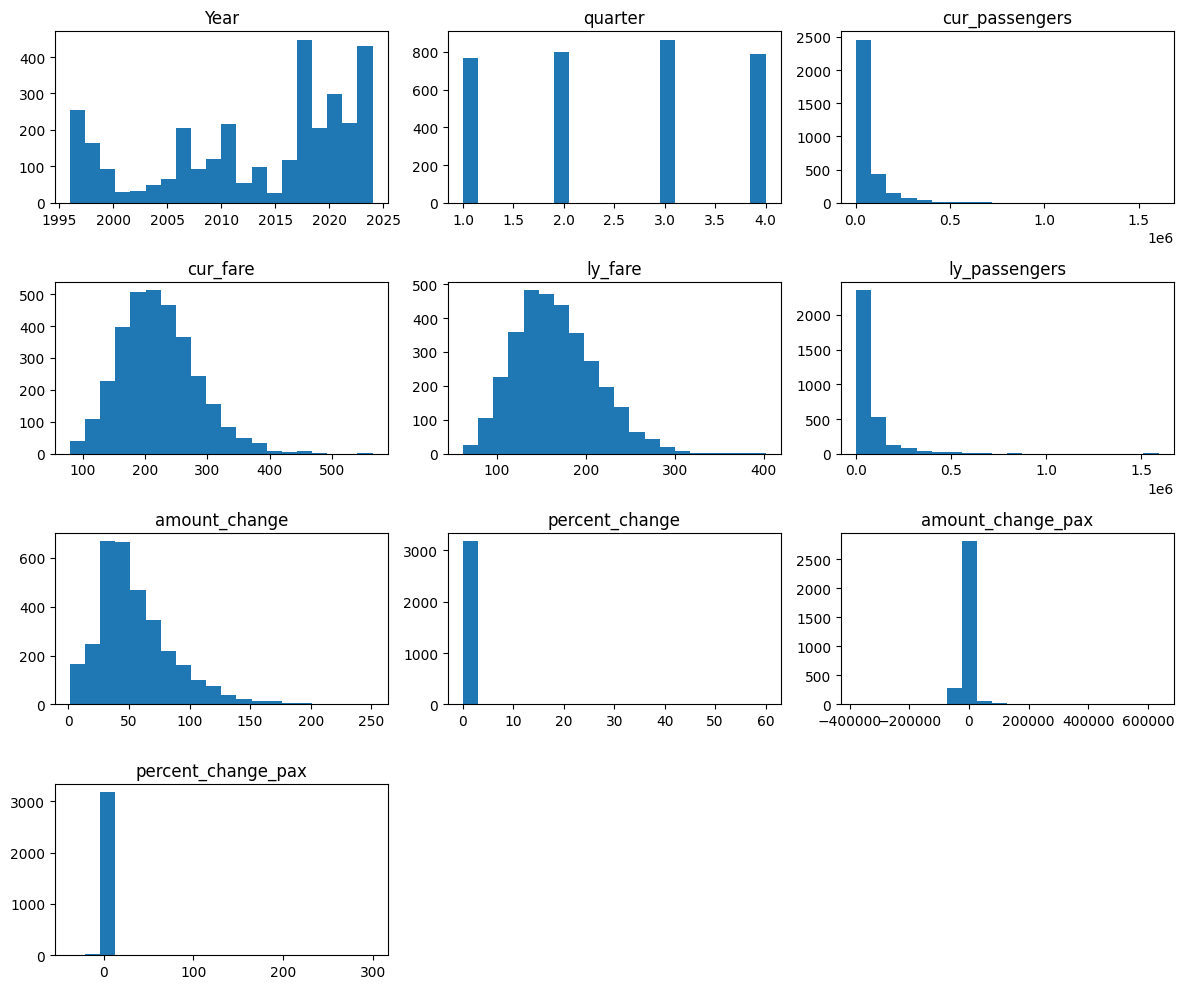

In [13]:
#make histogram for numer
numer.hist(figsize=(12, 10), bins=20, grid = False)
plt.tight_layout()
plt.show()